In [321]:
import pandas as pd
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.spatial.distance import cdist
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import decomposition
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

data = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_6/billets.csv")
df=pd.DataFrame(data)
df.head()

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [322]:
df=df.dropna().reset_index(drop=True)

In [323]:
df.duplicated().sum() #Il n'y a aucun doublon

0

In [324]:
print(df.is_genuine.groupby(df.is_genuine).count()) #Il n'y a que des vrais et des faux

is_genuine
False     70
True     100
Name: is_genuine, dtype: int64


In [325]:
print(df.describe())

           length  height_left  height_right  margin_low   margin_up  \
count  170.000000   170.000000    170.000000  170.000000  170.000000   
mean   171.940588   104.066353    103.928118    4.612118    3.170412   
std      0.305768     0.298185      0.330980    0.702103    0.236361   
min    171.040000   103.230000    103.140000    3.540000    2.270000   
25%    171.730000   103.842500    103.690000    4.050000    3.012500   
50%    171.945000   104.055000    103.950000    4.450000    3.170000   
75%    172.137500   104.287500    104.170000    5.127500    3.330000   
max    173.010000   104.860000    104.950000    6.280000    3.680000   

         diagonal  
count  170.000000  
mean   112.570412  
std      0.924448  
min    109.970000  
25%    111.855000  
50%    112.845000  
75%    113.287500  
max    113.980000  


<function matplotlib.pyplot.show(*args, **kw)>

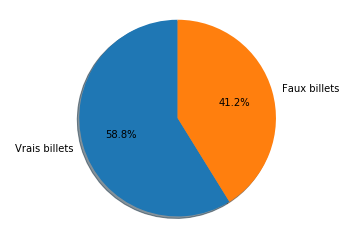

In [326]:
labels = 'Vrais billets', 'Faux billets'
sizes = [df.is_genuine[df.is_genuine==True].count(),df.is_genuine[df.is_genuine==False].count()]

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show

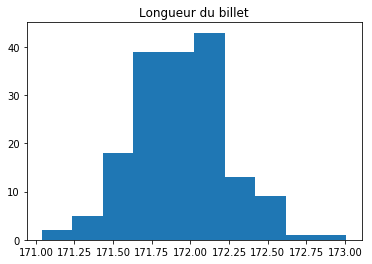

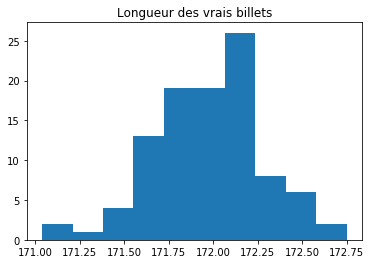

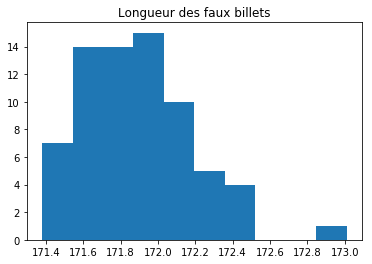

La longueur moyenne est de  :  171.94058823529414 mm
La valeur médiane est :  171.945 mm
La tendance centrale ou le mode est :  172 mm
La valeur minimale est :  171.04 mm
La valeur maximale est :  173.01 mm


In [327]:
fig, ax = plt.subplots()
ax.hist(df.length)
plt.title("Longueur du billet")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.length[df.is_genuine==True])
plt.title("Longueur des vrais billets")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.length[df.is_genuine==False])
plt.title("Longueur des faux billets")
plt.show()

print("La longueur moyenne est de  : ", df.length.mean(), "mm")
print("La valeur médiane est : ", df.length.median(), "mm")
print("La tendance centrale ou le mode est : ", int(df.length.mode()), "mm" )
print("La valeur minimale est : ", df.length.min(), "mm")
print("La valeur maximale est : ", df.length.max(), "mm")

In [328]:
print(df[df.length>172.6][df.is_genuine==False].length) #le faux billet 166 semble être un outlier. Je le retirerai peut être de certaines analyses

166    173.01
Name: length, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


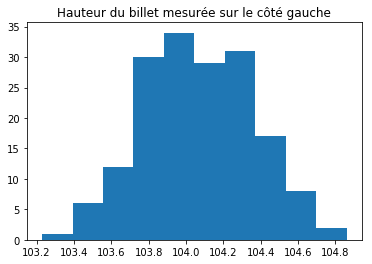

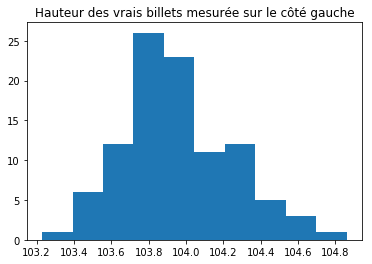

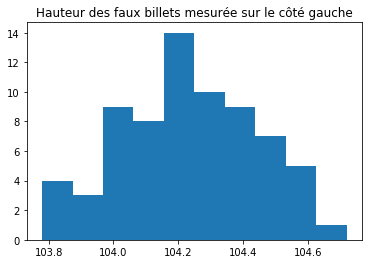

La hauteur moyenne est de  :  104.0663529411764 mm
La valeur médiane est :  104.055 mm
La tendance centrale ou le mode est :  104.17 et 104.32 mm
La valeur minimale est :  103.23 mm
La valeur maximale est :  104.86 mm


In [329]:
fig, ax = plt.subplots()
ax.hist(df.height_left)
plt.title("Hauteur du billet mesurée sur le côté gauche")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.height_left[df.is_genuine==True])
plt.title("Hauteur des vrais billets mesurée sur le côté gauche")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.height_left[df.is_genuine==False])
plt.title("Hauteur des faux billets mesurée sur le côté gauche")
plt.show()

print("La hauteur moyenne est de  : ", df.height_left.mean(), "mm")
print("La valeur médiane est : ", df.height_left.median(), "mm")
print("La tendance centrale ou le mode est : ", df.height_left.mode().min(),"et", df.height_left.mode().max(), "mm" )
print("La valeur minimale est : ", df.height_left.min(), "mm")
print("La valeur maximale est : ", df.height_left.max(), "mm")

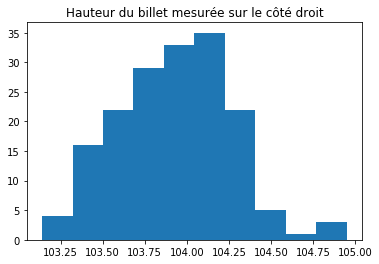

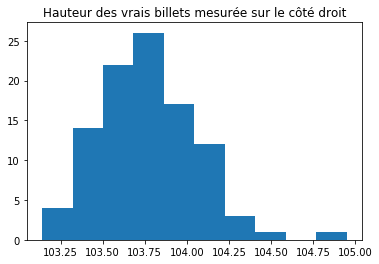

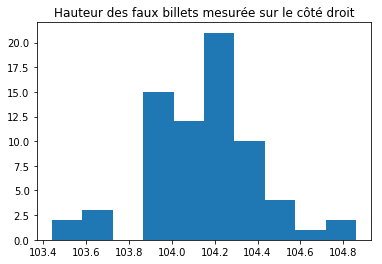

La hauteur moyenne est de  :  103.92811764705884 mm
La valeur médiane est :  103.95 mm
La tendance centrale ou le mode est :  103.76 et 104.06 mm
La valeur minimale est :  103.14 mm
La valeur maximale est :  104.95 mm


In [330]:
fig, ax = plt.subplots()
ax.hist(df.height_right)
plt.title("Hauteur du billet mesurée sur le côté droit")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.height_right[df.is_genuine==True])
plt.title("Hauteur des vrais billets mesurée sur le côté droit")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.height_right[df.is_genuine==False])
plt.title("Hauteur des faux billets mesurée sur le côté droit")
plt.show()

print("La hauteur moyenne est de  : ", df.height_right.mean(), "mm")
print("La valeur médiane est : ", df.height_right.median(), "mm")
print("La tendance centrale ou le mode est : ", df.height_right.mode().min(),"et", df.height_right.mode().max(), "mm" )
print("La valeur minimale est : ", df.height_right.min(), "mm")
print("La valeur maximale est : ", df.height_right.max(), "mm")

In [331]:
print(df[df.height_right<103.8][df.is_genuine==False]) #5 individus ont une hauteur droite en dessus de 103.8

     is_genuine  length  height_left  height_right  margin_low  margin_up  \
141       False  171.74       103.96        103.47        5.14       3.30   
151       False  171.68       103.89        103.70        5.97       3.03   
152       False  171.67       103.79        103.44        5.13       3.32   
156       False  171.38       103.78        103.70        5.22       3.43   
160       False  172.50       104.07        103.71        3.82       3.63   

     diagonal  
141    111.40  
151    109.97  
152    111.47  
156    111.60  
160    110.74  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [332]:
print(df[df.height_right>104.75][df.is_genuine==True]) #le vrai billet 0 semble être un outlier, à surveiller

   is_genuine  length  height_left  height_right  margin_low  margin_up  \
0        True  171.81       104.86        104.95        4.52       2.89   

   diagonal  
0    112.83  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


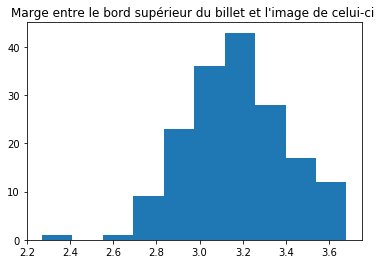

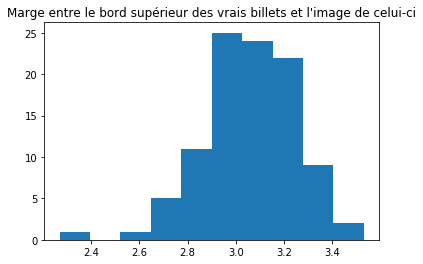

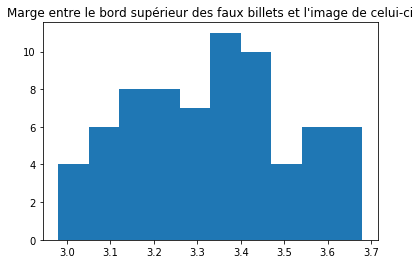

La longueur moyenne est de  :  3.170411764705883 mm
La valeur médiane est :  3.17 mm
La tendance centrale ou le mode est :  3.07 et 3.24 mm
La valeur minimale est :  2.27 mm
La valeur maximale est :  3.68 mm


In [333]:
fig, ax = plt.subplots()
ax.hist(df.margin_up)
plt.title("Marge entre le bord supérieur du billet et l'image de celui-ci ")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.margin_up[df.is_genuine==True])
plt.title("Marge entre le bord supérieur des vrais billets et l'image de celui-ci")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.margin_up[df.is_genuine==False])
plt.title("Marge entre le bord supérieur des faux billets et l'image de celui-ci")
plt.show()

print("La longueur moyenne est de  : ", df.margin_up.mean(), "mm")
print("La valeur médiane est : ", df.margin_up.median(), "mm")
print("La tendance centrale ou le mode est : ", df.margin_up.mode().min(),"et",df.margin_up.mode().max(), "mm" )
print("La valeur minimale est : ", df.margin_up.min(), "mm")
print("La valeur maximale est : ", df.margin_up.max(), "mm")

In [334]:
print(df[df.margin_up<2.5][df.is_genuine==True])   #Le vrai billet 4 il semble être un outlier, à surveiller

   is_genuine  length  height_left  height_right  margin_low  margin_up  \
4        True  172.05        103.7        103.75        5.04       2.27   

   diagonal  
4    113.55  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


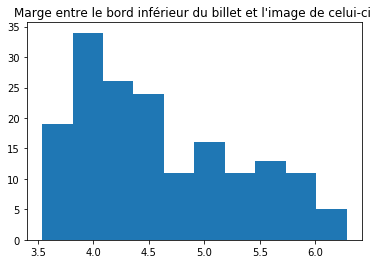

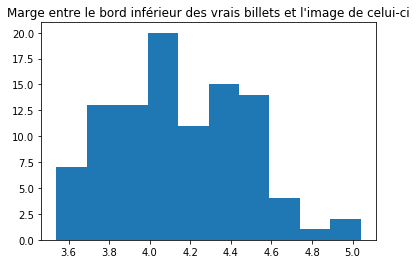

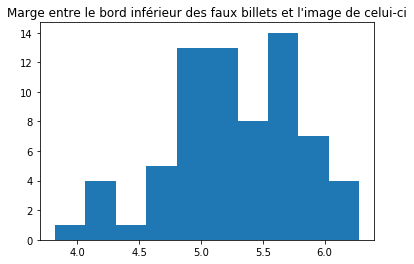

La longueur moyenne est de  :  4.612117647058824 mm
La valeur médiane est :  4.45 mm
La tendance centrale ou le mode est :  3.97 et 4.08 mm
La valeur minimale est :  3.54 mm
La valeur maximale est :  6.28 mm


In [335]:
fig, ax = plt.subplots()
ax.hist(df.margin_low)
plt.title("Marge entre le bord inférieur du billet et l'image de celui-ci ")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.margin_low[df.is_genuine==True])
plt.title("Marge entre le bord inférieur des vrais billets et l'image de celui-ci")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.margin_low[df.is_genuine==False])
plt.title("Marge entre le bord inférieur des faux billets et l'image de celui-ci")
plt.show()

print("La longueur moyenne est de  : ", df.margin_low.mean(), "mm")
print("La valeur médiane est : ", df.margin_low.median(), "mm")
print("La tendance centrale ou le mode est : ", df.margin_low.mode().min(),"et",df.margin_low.mode().max(), "mm" )
print("La valeur minimale est : ", df.margin_low.min(), "mm")
print("La valeur maximale est : ", df.margin_low.max(), "mm")

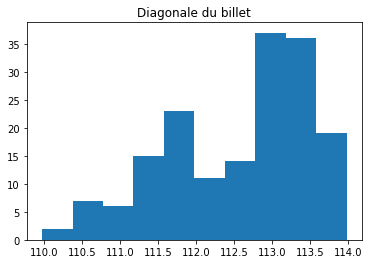

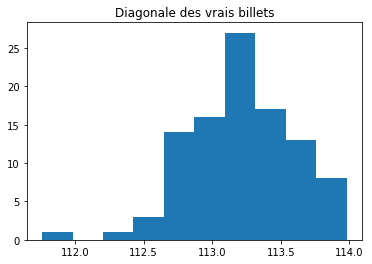

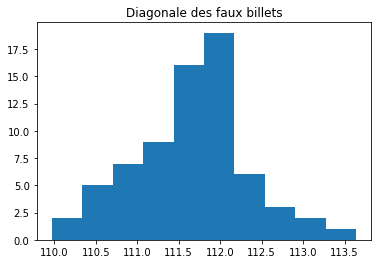

La longueur moyenne est de  :  112.57041176470587 mm
La valeur médiane est :  112.845 mm
La tendance centrale ou le mode est :  113 mm
La valeur minimale est :  109.97 mm
La valeur maximale est :  113.98 mm


In [336]:
fig, ax = plt.subplots()
ax.hist(df.diagonal)
plt.title("Diagonale du billet")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.diagonal[df.is_genuine==True])
plt.title("Diagonale des vrais billets")
plt.show()

fig, ax = plt.subplots()
ax.hist(df.diagonal[df.is_genuine==False])
plt.title("Diagonale des faux billets")
plt.show()

print("La longueur moyenne est de  : ", df.diagonal.mean(), "mm")
print("La valeur médiane est : ", df.diagonal.median(), "mm")
print("La tendance centrale ou le mode est : ", int(df.diagonal.mode()), "mm" )
print("La valeur minimale est : ", df.diagonal.min(), "mm")
print("La valeur maximale est : ", df.diagonal.max(), "mm")

In [337]:
print(df[df.diagonal<112][df.is_genuine==True])   #Le vrai billet 69 semble être un outlier, à surveiller

    is_genuine  length  height_left  height_right  margin_low  margin_up  \
69        True  171.94       104.11        104.16        4.08       3.35   

    diagonal  
69    111.76  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [338]:
# résumé des billets à surveiller : 
may_outlier=[0,4,69,166]

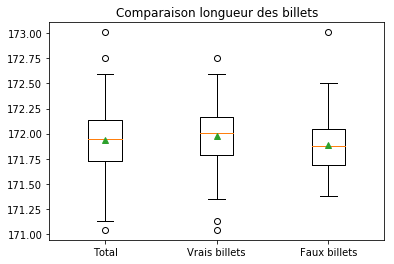

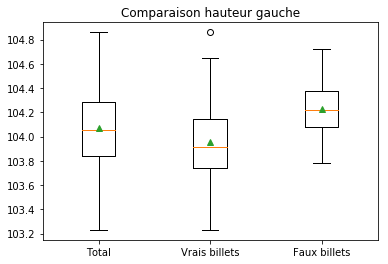

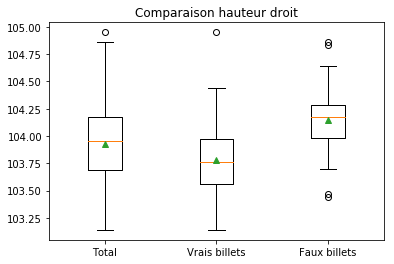

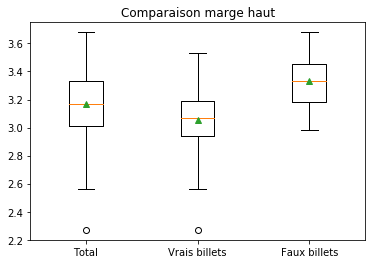

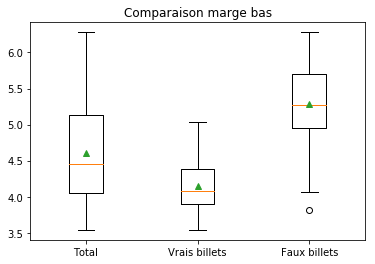

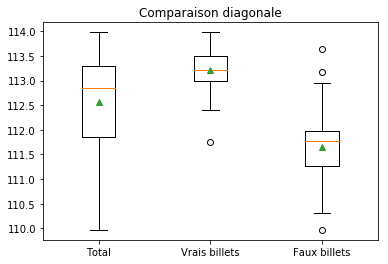

In [339]:
fig, ax = plt.subplots()
ax.boxplot([df.length,df.length[df.is_genuine==True],df.length[df.is_genuine==False]],showmeans=True)
plt.title('Comparaison longueur des billets')
plt.gca().xaxis.set_ticklabels(['Total','Vrais billets',"Faux billets"])
plt.show()

fig, ax = plt.subplots()
ax.boxplot([df.height_left,df.height_left[df.is_genuine==True],df.height_left[df.is_genuine==False]],showmeans=True)
plt.title('Comparaison hauteur gauche')
plt.gca().xaxis.set_ticklabels(['Total','Vrais billets',"Faux billets"])
plt.show()

fig, ax = plt.subplots()
ax.boxplot([df.height_right,df.height_right[df.is_genuine==True],df.height_right[df.is_genuine==False]],showmeans=True)
plt.title('Comparaison hauteur droit')
plt.gca().xaxis.set_ticklabels(['Total','Vrais billets',"Faux billets"])
plt.show()

fig, ax = plt.subplots()
ax.boxplot([df.margin_up,df.margin_up[df.is_genuine==True],df.margin_up[df.is_genuine==False]],showmeans=True)
plt.title('Comparaison marge haut')
plt.gca().xaxis.set_ticklabels(['Total','Vrais billets',"Faux billets"])
plt.show()

fig, ax = plt.subplots()
ax.boxplot([df.margin_low,df.margin_low[df.is_genuine==True],df.margin_low[df.is_genuine==False]],showmeans=True)
plt.title('Comparaison marge bas')
plt.gca().xaxis.set_ticklabels(['Total','Vrais billets',"Faux billets"])
plt.show()

fig, ax = plt.subplots()
ax.boxplot([df.diagonal,df.diagonal[df.is_genuine==True],df.diagonal[df.is_genuine==False]],showmeans=True)
plt.title('Comparaison diagonale')
plt.gca().xaxis.set_ticklabels(['Total','Vrais billets',"Faux billets"])
plt.show()

In [340]:
sous_echantillon = df.copy()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [341]:
X = "is_genuine"
Y = "length"

#Hypothèse H0 : les deux variables sont indépendantes

print(eta_squared(sous_echantillon[X],sous_echantillon[Y]))
results = ols('sous_echantillon[Y] ~ sous_echantillon[X]', data=sous_echantillon).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
print("\n",aov_table.iloc[0])

#P-value > seuil de 5%  on rejette donc pas l'hypothèse. Les deux variables sont donc indépendantes

0.019383108567093802

 sum_sq    0.306264
df        1.000000
F         3.320728
PR(>F)    0.070190
Name: sous_echantillon[X], dtype: float64


In [342]:
X = "is_genuine"
Y = "height_left"

#Hypothèse H0 : les deux variables sont indépendantes

print(eta_squared(sous_echantillon[X],sous_echantillon[Y]))
results = ols('sous_echantillon[Y] ~ sous_echantillon[X]', data=sous_echantillon).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
print("\n",aov_table.iloc[0])

#P-value < seuil de 5%  on rejette donc l'hypothèse. Les deux variables sont donc corrélées

0.21319458315018705

 sum_sq    3.203577e+00
df        1.000000e+00
F         4.552166e+01
PR(>F)    2.334200e-10
Name: sous_echantillon[X], dtype: float64


In [343]:
X = "is_genuine"
Y = "height_right"

#Hypothèse H0 : les deux variables sont indépendantes

print(eta_squared(sous_echantillon[X],sous_echantillon[Y]))
results = ols('sous_echantillon[Y] ~ sous_echantillon[X]', data=sous_echantillon).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
print("\n",aov_table.iloc[0])

#P-value < seuil de 5%  on rejette donc l'hypothèse. Les deux variables sont donc corrélées

0.30394154672012125

 sum_sq    5.627052e+00
df        1.000000e+00
F         7.335904e+01
PR(>F)    6.665246e-15
Name: sous_echantillon[X], dtype: float64


In [344]:
X = "is_genuine"
Y = "margin_up"

#Hypothèse H0 : les deux variables sont indépendantes

print(eta_squared(sous_echantillon[X],sous_echantillon[Y]))
results = ols('sous_echantillon[Y] ~ sous_echantillon[X]', data=sous_echantillon).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
print("\n",aov_table.iloc[0])

#P-value < seuil de 5%  on rejette donc l'hypothèse. Les deux variables sont donc corrélées

0.3396567096032002

 sum_sq    3.206859e+00
df        1.000000e+00
F         8.641312e+01
PR(>F)    7.567386e-17
Name: sous_echantillon[X], dtype: float64


In [345]:
X = "is_genuine"
Y = "margin_low"

#Hypothèse H0 : les deux variables sont indépendantes

print(eta_squared(sous_echantillon[X],sous_echantillon[Y]))
results = ols('sous_echantillon[Y] ~ sous_echantillon[X]', data=sous_echantillon).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
print("\n",aov_table.iloc[0])

#P-value < seuil de 5%  on rejette donc l'hypothèse. Les deux variables sont donc corrélées

0.640177214288775

 sum_sq    5.333204e+01
df        1.000000e+00
F         2.988965e+02
PR(>F)    3.940145e-39
Name: sous_echantillon[X], dtype: float64


In [346]:
X = "is_genuine"
Y = "diagonal"

#Hypothèse H0 : les deux variables sont indépendantes

print(eta_squared(sous_echantillon[X],sous_echantillon[Y]))
results = ols('sous_echantillon[Y] ~ sous_echantillon[X]', data=sous_echantillon).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
print("\n",aov_table.iloc[0])

#P-value < seuil de 5%  on rejette donc l'hypothèse. Les deux variables sont donc corrélées

0.6818507654957807

 sum_sq    9.847839e+01
df        1.000000e+00
F         3.600541e+02
PR(>F)    1.234823e-43
Name: sous_echantillon[X], dtype: float64


In [347]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            
            
            
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            
            

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

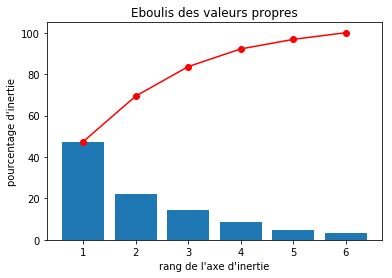

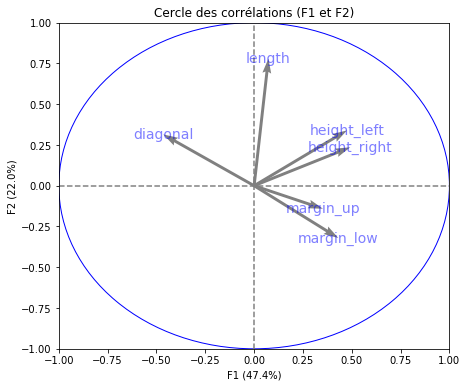

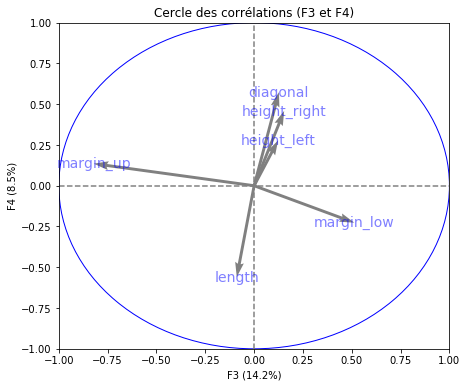

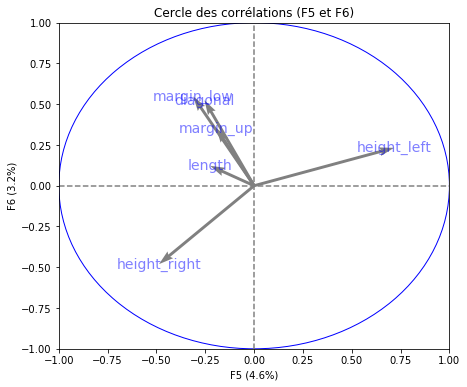

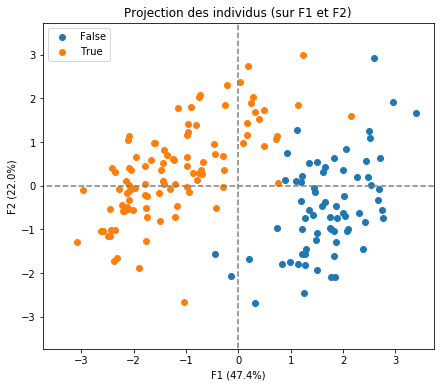

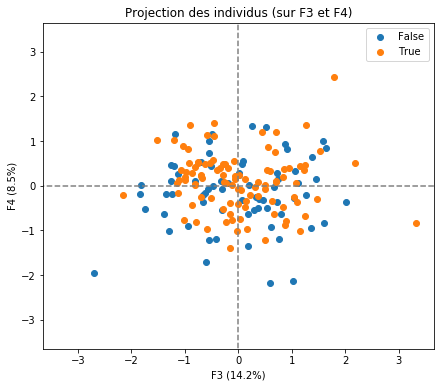

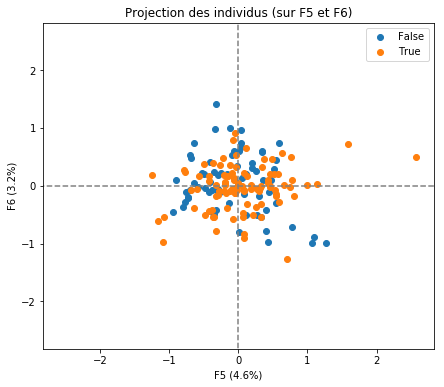

In [348]:
# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
X = df.drop(columns="is_genuine").values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)],labels = np.array(df.drop(columns="is_genuine").columns))
display_circles(pcs, n_comp, pca, [(2,3)],labels = np.array(df.drop(columns="is_genuine").columns))
display_circles(pcs, n_comp, pca, [(4,5)],labels = np.array(df.drop(columns="is_genuine").columns))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],illustrative_var=df.is_genuine)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)],illustrative_var=df.is_genuine)
display_factorial_planes(X_projected, n_comp, pca, [(4,5)],illustrative_var=df.is_genuine)




In [349]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
print(pd.DataFrame({'id':df.index,'Contribution dans l_inertie totale':di,'Vrai_Faux':df.is_genuine}).set_index("id").sort_values(by='Contribution dans l_inertie totale', ascending=False).head(10))
print(pd.DataFrame({'id':df.index,'Contribution dans l_inertie totale':di,'Vrai_Faux':df.is_genuine}).set_index("id").sort_values(by='Contribution dans l_inertie totale', ascending=True).head(10))


#qualité de représentation des individus - COS2
cos2 = X_projected**2
for j in range(6):
 cos2[:,j] = cos2[:,j]/di
df_cos2=pd.DataFrame({'id':df.index,'COS2_F1':cos2[:,0],'COS2_F2':cos2[:,1],'COS2_1er_plan_factoriel':cos2[:,0]+cos2[:,1],'Vrai_Faux':df.is_genuine}).set_index("id")

print("\n",df_cos2.sort_values(by='COS2_1er_plan_factoriel',ascending=False).head(10))
print("\n",df_cos2.sort_values(by='COS2_1er_plan_factoriel',ascending=True).head(10))

#Contribution aux axes
n=df.drop(columns="is_genuine").shape[0]
eigval = (n-1)/n*pca.explained_variance_
ctr = X_projected**2
for j in range(6):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print("\n",1/170)

print("\n",pd.DataFrame({'id':df.index,'CTR_F1':ctr[:,0],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F1",ascending=False).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F1':ctr[:,0],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F1",ascending=True).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F2':ctr[:,1],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F2",ascending=False).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F2':ctr[:,1],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F2",ascending=True).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F3':ctr[:,2],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F3",ascending=False).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F3':ctr[:,2],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F3",ascending=True).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F4':ctr[:,3],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F4",ascending=False).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F4':ctr[:,3],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F4",ascending=True).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F5':ctr[:,4],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F5",ascending=False).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F5':ctr[:,4],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F5",ascending=True).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F6':ctr[:,5],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F6",ascending=False).set_index("id").head(10))
print("\n",pd.DataFrame({'id':df.index,'CTR_F6':ctr[:,5],'Vrai_Faux':df.is_genuine}).sort_values(by="CTR_F6",ascending=True).set_index("id").head(10))


     Contribution dans l_inertie totale  Vrai_Faux
id                                                
166                           20.625650      False
0                             18.410598       True
4                             18.039567       True
122                           16.790944      False
39                            15.052608       True
112                           14.422407      False
151                           13.637281      False
49                            12.917538       True
160                           12.831169      False
158                           12.724639      False
    Contribution dans l_inertie totale  Vrai_Faux
id                                               
64                            0.813929       True
98                            0.878319       True
85                            1.431664       True
76                            1.435202       True
59                            1.484454       True
83                            1.659976

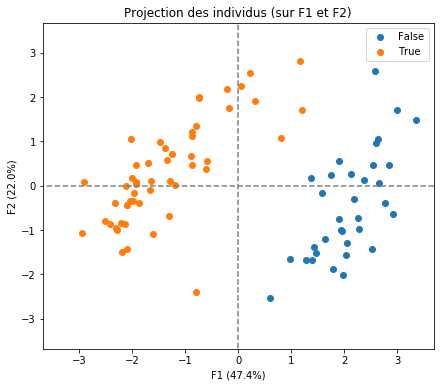

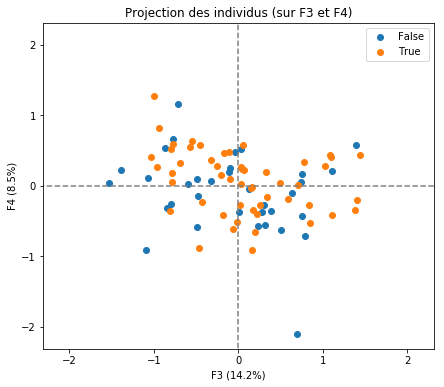

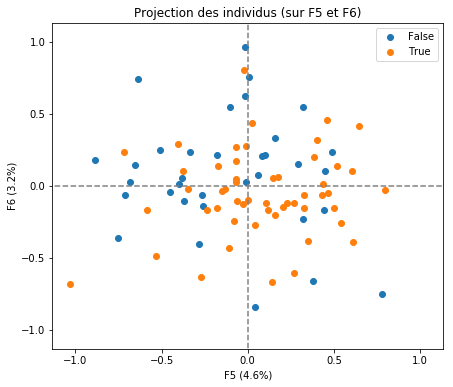

In [350]:
df_reduit=pd.merge(df.reset_index(),df_cos2.reset_index().rename(columns={"id":"index"}),how="left")
df_reduit=df_reduit[df_reduit.COS2_1er_plan_factoriel>0.73]
df_reduit=df_reduit.drop(columns={"COS2_1er_plan_factoriel","COS2_F2","COS2_F1","index","Vrai_Faux"})

#plus que 86 individus

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
X = df_reduit.drop(columns="is_genuine").values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],illustrative_var=df_reduit.is_genuine)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)],illustrative_var=df_reduit.is_genuine)
display_factorial_planes(X_projected, n_comp, pca, [(4,5)],illustrative_var=df_reduit.is_genuine)




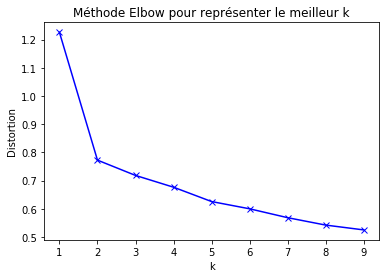

In [351]:
# Determiner k avec la méthode Elbow
X = df.drop(columns="is_genuine").values
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# afficher Elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Méthode Elbow pour représenter le meilleur k')
plt.show()

#Lorsque k augmente, les centroides sont plus proches du centre des clusters.
#k est alors optimal pour K=2

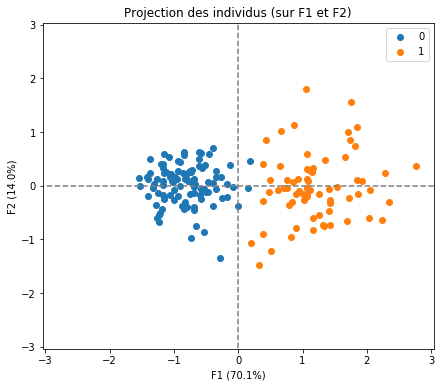

In [352]:
n_clust = 2

X = df.drop(columns="is_genuine").values

X_scaled = preprocessing.StandardScaler().fit_transform(X)
km = KMeans(n_clusters= n_clust)
km.fit(X)

clusters = km.labels_

# Affichage du clustering par projection des individus sur le prmeier plan factoriel
pca = decomposition.PCA(n_components=6).fit(X)
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_clust, pca, [(0,1)],illustrative_var=clusters)

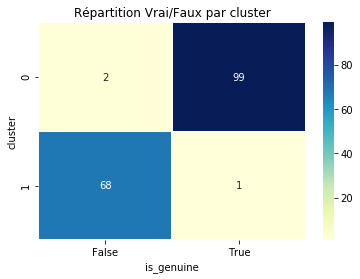

In [353]:
df_clusters = pd.DataFrame({"cluster": clusters,"is_genuine":df.is_genuine})

ax = plt.axes()
sns.heatmap(df_clusters.pivot_table(index="cluster" , columns="is_genuine", aggfunc=len, fill_value=0), annot=True, linewidths=.3, cmap="YlGnBu")
ax.set_title('Répartition Vrai/Faux par cluster')
plt.show()



In [354]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


# On récupère les features d'un côté...
X = df.iloc[:,1:]
X=X.values
# et les labels de l'autre
y = df.iloc[:,0] 
y=y.values

lr = LogisticRegression()

lr.fit(X,y)

classes_predites=lr.predict(X)

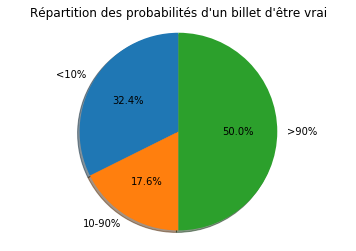

Le nombre d'erreur est de :  0

 Le taux d'erreur est donc de :  0.0

 Voici la matrice de confusion qui en découle [[13, 0], [0, 21]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


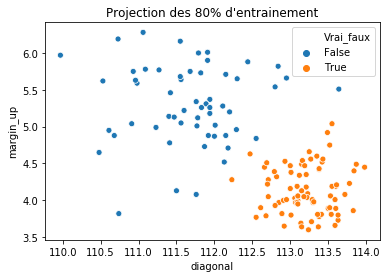

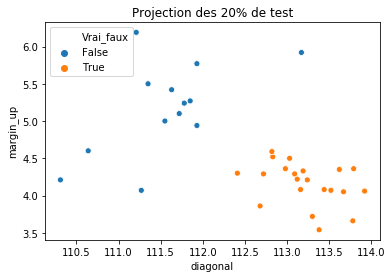

In [355]:
from random import shuffle
nb_erreur = 0

# découpe du jeu d'exemples en 80 % pour l'entraînement du modèle, le reste pour son test
p = 0.8 # 80%
listeDesIndices = [i for i in range (len (X))]
shuffle (listeDesIndices)

# la liste des indices des exemples utilisés pour l'entraînement
indices_entrainement = listeDesIndices [0:int(p*len(X))]

# la liste des indices des exemples utilisés pour le test
indices_test = listeDesIndices[int(p*len(X)):len(X)]

# on entraîne le modèle
lr.fit(X[indices_entrainement], y[indices_entrainement])

# on prédit la classe des exemples du jeu de test
classe_predite = lr.predict(X[indices_test])
classe_predite_entrainement = lr.predict(X[indices_entrainement])
lr_predict=pd.DataFrame(lr.predict_proba(X[indices_test]))



labels = '<10%', '10-90%','>90%'
sizes = [lr_predict[1][lr_predict[1]<=0.1].count(),lr_predict[1][(lr_predict[1]>0.1) & (lr_predict[1]<0.9)].count(),lr_predict[1][lr_predict[1]>=0.9].count()]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Répartition des probabilités d'un billet d'être vrai")
plt.axis('equal')
plt.show()


# on calcule le nombre d'erreurs de prédiction
for i in range (len(indices_test)):
    if y[indices_test [i]] != classe_predite [i]:
        nb_erreur += 1
        
# et on calcule le taux d'erreur demandé
taux_erreur = nb_erreur / len (indices_test)
print("Le nombre d'erreur est de : ", nb_erreur)
print("\n Le taux d'erreur est donc de : ",taux_erreur)

matrice_confusion = [[0, 0], [0, 0]]
for i in range (len (indices_test)):
    matrice_confusion [y[indices_test [i]]] [classe_predite [i]] += 1
print("\n Voici la matrice de confusion qui en découle", matrice_confusion)

results_entrainement={"diagonal":pd.DataFrame(X[indices_entrainement])[5].tolist(),"margin_up":pd.DataFrame(X[indices_entrainement])[3].tolist(),"Vrai_faux":classe_predite_entrainement}
df_results=pd.DataFrame(results_entrainement)
ax=sns.scatterplot(x="diagonal", y="margin_up", hue="Vrai_faux",data=df_results)
ax.set_title("Projection des 80% d'entrainement")
plt.show()



results_test={"diagonal":pd.DataFrame(X[indices_test])[5].tolist(),"margin_up":pd.DataFrame(X[indices_test])[3].tolist(),"Vrai_faux":classe_predite}
df_test=pd.DataFrame(results_test)
ax=sns.scatterplot(x="diagonal", y="margin_up", hue="Vrai_faux",data=df_test)
ax.set_title("Projection des 20% de test")
plt.show()

0.987857142857143


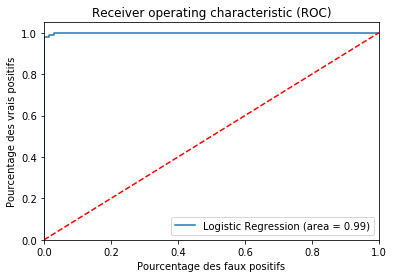

In [363]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, lr.predict(X))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Pourcentage des faux positifs')
plt.ylabel('Pourcentage des vrais positifs')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [357]:
billets_tests = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_6/exemple.csv")
print(billets_tests)
print("\n",lr.predict(billets_tests.set_index('id')))
print("\n",lr.predict_proba(billets_tests.set_index('id')))

   length  height_left  height_right  margin_low  margin_up  diagonal   id
0  171.76       104.01        103.54        5.21       3.30    111.42  B_1
1  171.87       104.17        104.13        6.00       3.31    112.09  B_2
2  172.00       104.58        104.29        4.99       3.39    111.57  B_3
3  172.49       104.55        104.34        4.44       3.03    113.20  B_4
4  171.65       103.63        103.56        3.77       3.16    113.33  B_5

 [False False False  True  True]

 [[0.95411629 0.04588371]
 [0.98877895 0.01122105]
 [0.96997647 0.03002353]
 [0.15391163 0.84608837]
 [0.00550655 0.99449345]]


In [358]:
def test_billet(billets_tests):
    i=0
    columns = ['Vrai_Faux']
    df_results = pd.DataFrame(columns=columns)
    for i in billets_tests.index:
        if float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])>0.9:
            df_results=df_results.append({'Vrai_Faux':'Faux'},ignore_index=True)
            print("Le billet numéro {} a {} % de chance d être faux".format(i+1,round((float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])*100),3)))
        elif float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])<0.1:
            print("Le billet numéro {} a {} % de chance d être vrai".format(i+1,round((float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,1])*100),3)))
            df_results=df_results.append({'Vrai_Faux':'Vrai'},ignore_index=True)
        elif float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])<=0.9 and float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])>=0.5 :
            print("Le billet numéro {} a {} % de chance d être faux. Ce pourcentage est en dessous de 90%, la prediction est donc incertaine".format(i+1,round((float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])*100),3)))
            df_results=df_results.append({'Vrai_Faux':'Incertain, faux'},ignore_index=True)
        elif float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])<0.5 and float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,0])>=0.1 :
            print("Le billet numéro {} a {} % de chance d être vrai. Ce pourcentage est en dessous de 90%, la prediction est donc incertaine".format(i+1,round((float(lr.predict_proba(billets_tests[billets_tests.index==i].drop(columns='id'))[:,1])*100),3)))
            df_results=df_results.append({'Vrai_Faux':'Incertain, vrai'},ignore_index=True)
    df_results=df_results.set_index(billets_tests.id,drop=True)
    print("\n",df_results)

In [359]:
test_billet(billets_tests)

Le billet numéro 1 a 95.412 % de chance d être faux
Le billet numéro 2 a 98.878 % de chance d être faux
Le billet numéro 3 a 96.998 % de chance d être faux
Le billet numéro 4 a 84.609 % de chance d être vrai. Ce pourcentage est en dessous de 90%, la prediction est donc incertaine
Le billet numéro 5 a 99.449 % de chance d être vrai

            Vrai_Faux
id                  
B_1             Faux
B_2             Faux
B_3             Faux
B_4  Incertain, vrai
B_5             Vrai


In [360]:
#billets_examen = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_6/examen.csv")
#test_billet(billets_examen)